# 24_ESTIMACIÓN PUNTUAL DE PARÁMETROS (II)

In [1]:
# Importamos todas las librerías
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

# Definimos la semilla aleatoria
np.random.seed(567)

# Generamos una población N(170,10) de tamaño 10000
population = np.random.normal(loc = 170, scale = 10, size = 10000)

# Obtenemos una muestra aleatoria simple sin reemplazamiento de 100 individuos
size_sample = 100
sample = np.random.choice(population, size = size_sample)

# Para facilitar la visualización creamos series de pandas y mostramos los 5 primeros valores
population_pd = pd.Series(population)
sample_pd = pd.Series(sample)
print(f"La población tiene {len(population)} individuos")
print(population_pd.head())
print()
print(f"La muestra tiene {len(sample)} individuos")
print(sample_pd.head())
print()
mean_mu = np.mean(population)
std_sigma = np.std(population)
print(f"Media poblacional = {mean_mu:.2f}")
print(f"Desviación típica poblacional = {std_sigma:.2f}")
print()
mean_sample = np.mean(sample)
std_sample = np.std(sample, ddof = 1) # ddfo = 1 hace que sea insesgada (divide por n-1)
print(f"Media muestral = {mean_sample:.2f}")
print(f"Desviación estándar muestral = {std_sample:.2f}")

La población tiene 10000 individuos
0    172.132661
1    169.081006
2    169.106513
3    172.657557
4    173.760651
dtype: float64

La muestra tiene 100 individuos
0    161.413622
1    175.846687
2    173.536996
3    146.193062
4    188.447647
dtype: float64

Media poblacional = 169.99
Desviación típica poblacional = 10.05

Media muestral = 169.07
Desviación estándar muestral = 10.95


C:\Users\UJA\.conda\envs\Matematicas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\UJA\.conda\envs\Matematicas\lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


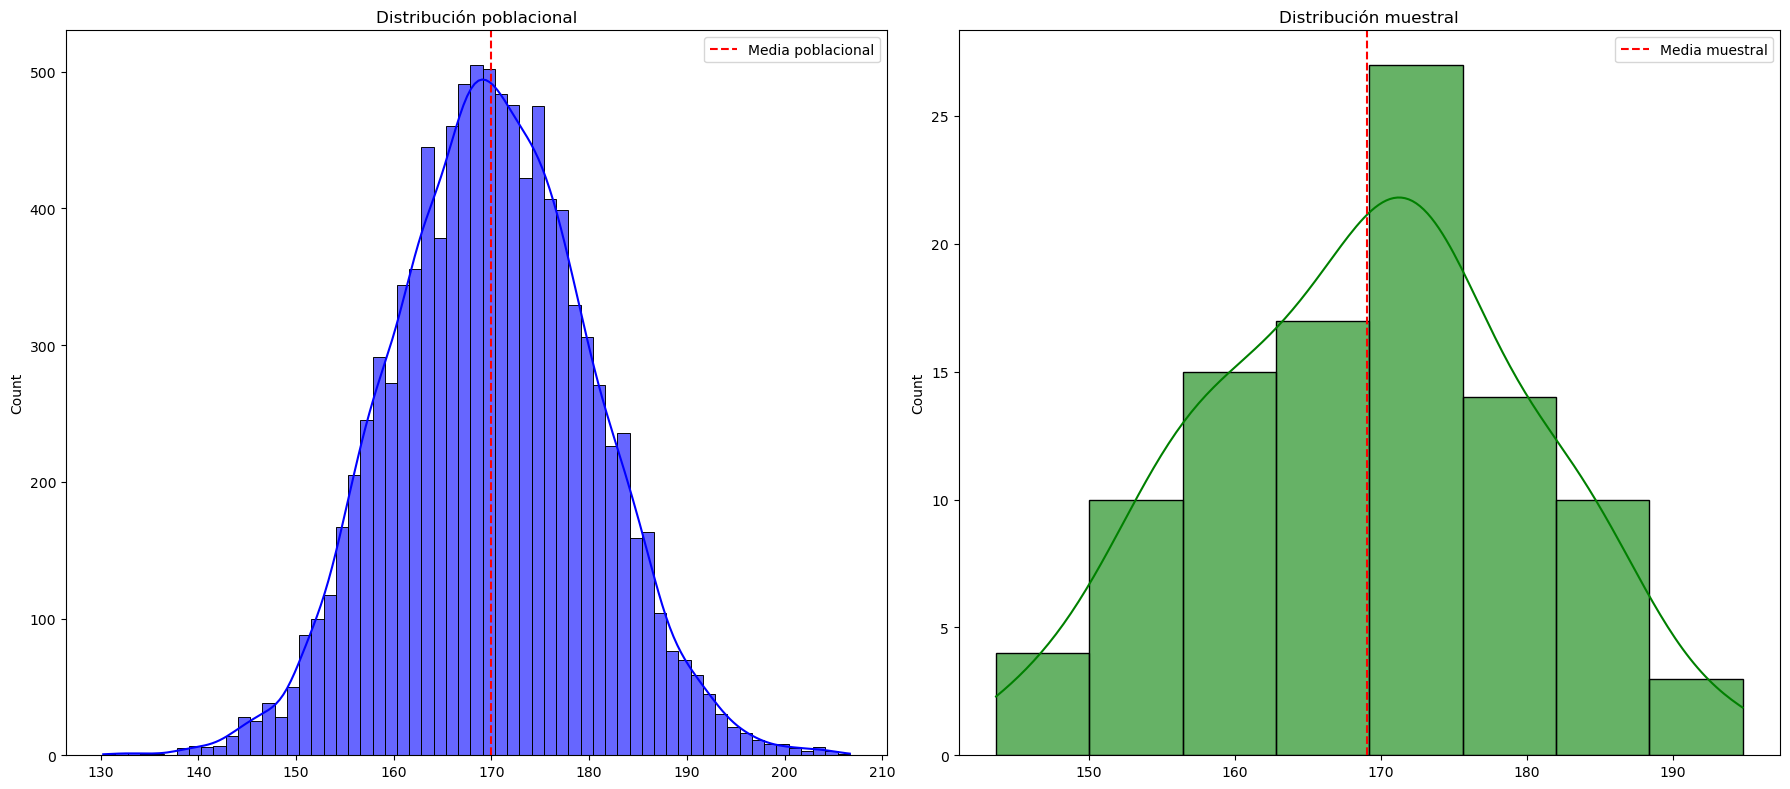

In [2]:
# Creamos un función que devuelve gráficos para comparar la población y la muestra

def compare_population_sample(population, sample):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize = (18, 8))

    # Gráfico de la población
    sns.histplot(population, kde = True, ax = ax1, color = 'blue', alpha = 0.6)
    ax1.axvline(np.mean(population), color = 'red', linestyle = '--', label = "Media poblacional")
    ax1.set_title("Distribución poblacional")
    ax1.legend()

    # Gráfico de la muestra
    sns.histplot(sample, kde = True, ax = ax2, color = 'green', alpha = 0.6)
    ax2.axvline(np.mean(sample), color = 'red', linestyle = '--', label = "Media muestral")
    ax2.set_title("Distribución muestral")
    ax2.legend()

    plt.tight_layout()
    plt.show

# Pasamos a esta función nuestras población y muestra
compare_population_sample(population,sample)

In [3]:
# Importamos la función apropiada de Scipy
from scipy.optimize import minimize

# Definimos la función de verosimilitud para N(mu,sigma) y la muestra
def log_MLV_normal(params, data):
    mu, sigma = params
    return -np.sum(stats.norm.logpdf(data, mu, sigma))

# Muestra, la que calculamos antes
data_MLE = sample

""" Estimación por máxima verosimilitud, partimos de los parámetros muestrales
media y desviación típica (la sesgada) """
initial_result = [np.mean(data_MLE) , np.std(data_MLE)]
result = minimize(log_MLV_normal, initial_result, args=(data_MLE,), method = 'Nelder-Mead')

# Veamos la salida
result

       message: Optimization terminated successfully.
       success: True
        status: 0
           fun: 380.74789430585804
             x: [ 1.691e+02  1.090e+01]
           nit: 30
          nfev: 61
 final_simplex: (array([[ 1.691e+02,  1.090e+01],
                       [ 1.691e+02,  1.090e+01],
                       [ 1.691e+02,  1.090e+01]]), array([ 3.807e+02,  3.807e+02,  3.807e+02]))

In [4]:
# Extraemos de esta información los parámetros estimados, el array x
print("Estimación por Máxima Verosimilitud:")
print(f"\tMedia estimada = {result.x[0]:.2f}")
print(f"\tDeviación estándar estimada = {result.x[1]:.2f}")

Estimación por Máxima Verosimilitud:
	Media estimada = 169.07
	Deviación estándar estimada = 10.90


In [5]:
# Función para obtener múltiples muestras
def multiple_sample(population, sample_size, n_samples = 1000): #Población, tamaño de cada muestra y, por defecto, 1000 muestras)
    means_samples = []
    variances_samples = []
    for _ in range(n_samples):
        sample = np.random.choice(population, size = sample_size, replace = True)
        means_samples.append(np.mean(sample))
        variances_samples.append(np.var(sample, ddof = 1))
    return np.array(means_samples), np.array(variances_samples)

La siguiente función nos va a permitir visualizar la convergencia del estimador de máxima versomilitud al aumentar el tamaño de muestra.

In [6]:
def convergence_estimator(population, size_sample):
    means = []
    std_ = []
    for n in size_sample:
        sample = np.random.choice(population, size = n, replace = True) 
        means.append(np.mean(sample))
        std_.append(np.std(sample,ddof = 1)/np.sqrt(n))
    fig, (ax1,ax2) = plt.subplots(1, 2, figsize = (18,8))

    #Convergencia de la media
    ax1.plot(size_sample, means, 'b-', label = 'Media muestral')
    ax1.axhline(y = np.mean(population), color = 'red',linestyle = '--', label = 'Media poblacional')
    ax1.set_xscale('log')
    ax1.set_title('Convergencia de la Media Muestral')
    ax1.set_xlabel('Tamaño de muestra')
    ax1.set_ylabel('Media')
    ax1.legend()

    #Convergencia del error estándar
    ax2.plot(size_sample, std_, 'g-', label = 'Error estándar')
    ax2.set_xscale('log')
    ax2.set_title('Disminución del error estándar')
    ax2.set_xlabel('Tamaño de muestra')
    ax2.set_ylabel('Error estándar')
    ax2.legend()

    plt.tight_layout()
    plt.show()    

Visualicemos la convergencia en escala logarítmica:

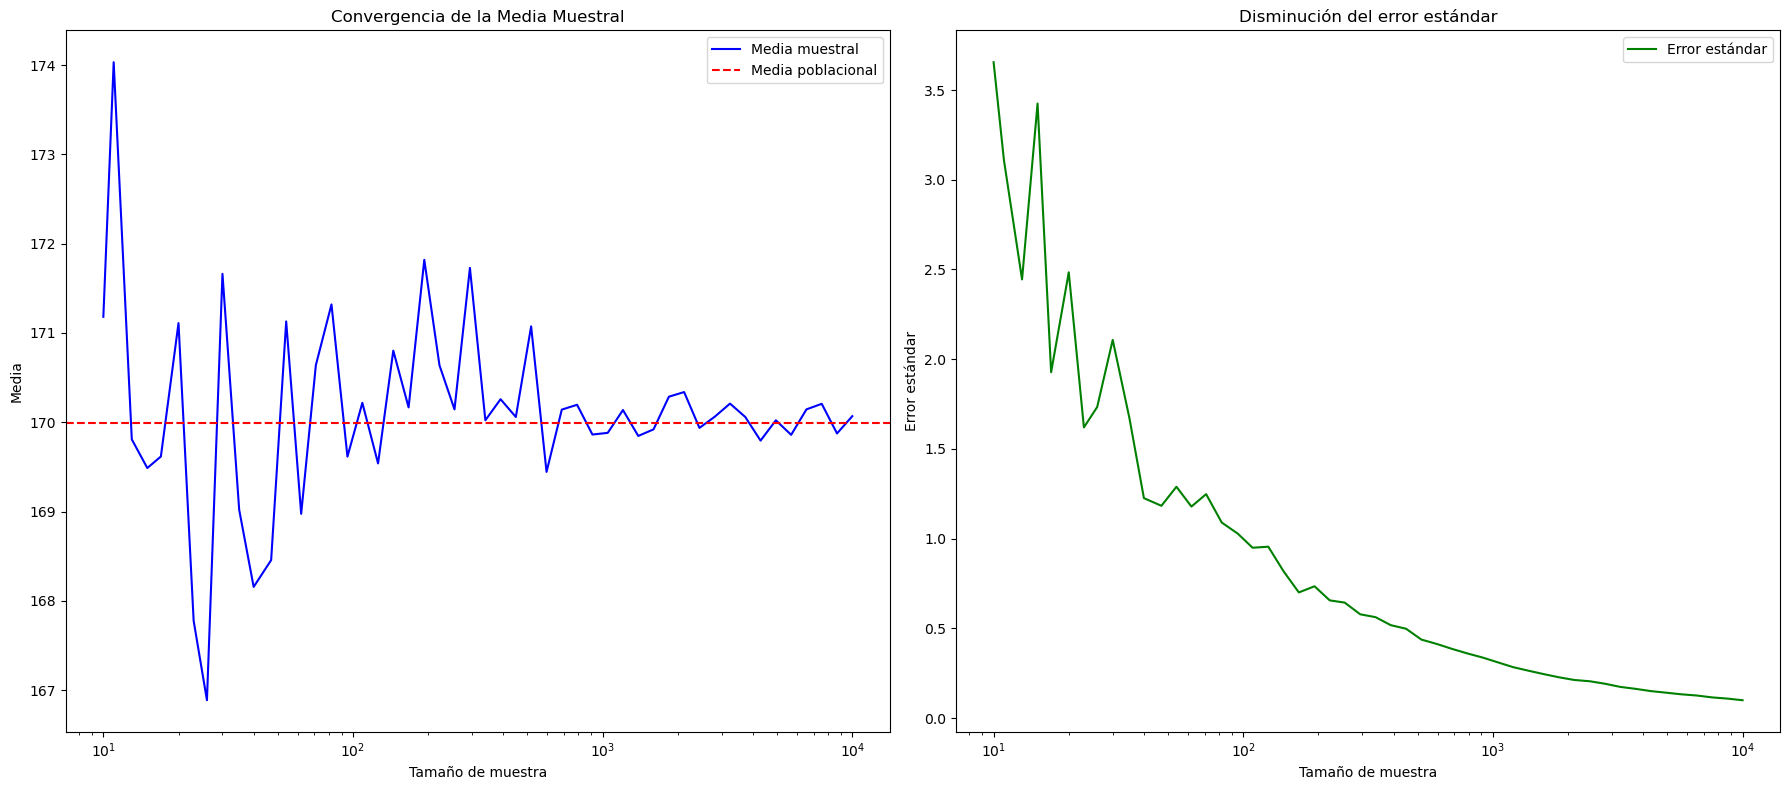

In [7]:
size_sample = np.logspace(1,4,50, dtype = int) # Escala logarítmica (el tamaña de muestra entre 10 y 10000)
convergence_estimator(population, size_sample)